# HandWritten Character Recognition

In [ ]:
Group - 21
Members:
    Amit Shukla - 201951021
    Neeraj Yadav - 201951100
    Shivam Malpani - 201951143
    Shreyansh Yadav - 201951147

In [1]:
import cv2
import numpy as np
import pandas as pd
import visualkeras as vk
import seaborn as sn
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [2]:
path="A_Z Handwritten Data.csv"

In [3]:
dataset = pd.read_csv(path).astype("float32")
dataset.rename(columns={'0': "label"}, inplace=True)

In [4]:
letter_x = dataset.drop("label", axis=1)
letter_y = dataset["label"]

# the data, split between train and test sets
(digit_train_x, digit_train_y), (digit_test_x, digit_test_y) = mnist.load_data()

In [5]:
print(digit_train_x.shape, digit_train_y.shape)
print(digit_test_x.shape, digit_test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
digit_data = np.concatenate((digit_train_x, digit_test_x))
digit_target = np.concatenate((digit_train_y, digit_test_y))

print(digit_data.shape, digit_target.shape)

(70000, 28, 28) (70000,)


In [8]:
digit_target += 26

In [9]:
data = []

for flatten in letter_x:
  image = np.reshape(flatten, (28, 28, 1))
  data.append(image)

letter_data = np.array(data, dtype=np.float32)
letter_target = letter_y

In [10]:
digit_data = np.reshape(digit_data, (digit_data.shape[0], digit_data.shape[1], digit_data.shape[2], 1))

In [11]:
print(letter_data.shape, letter_target.shape)
print(digit_data.shape, digit_target.shape)

(372450, 28, 28, 1) (372450,)
(70000, 28, 28, 1) (70000,)


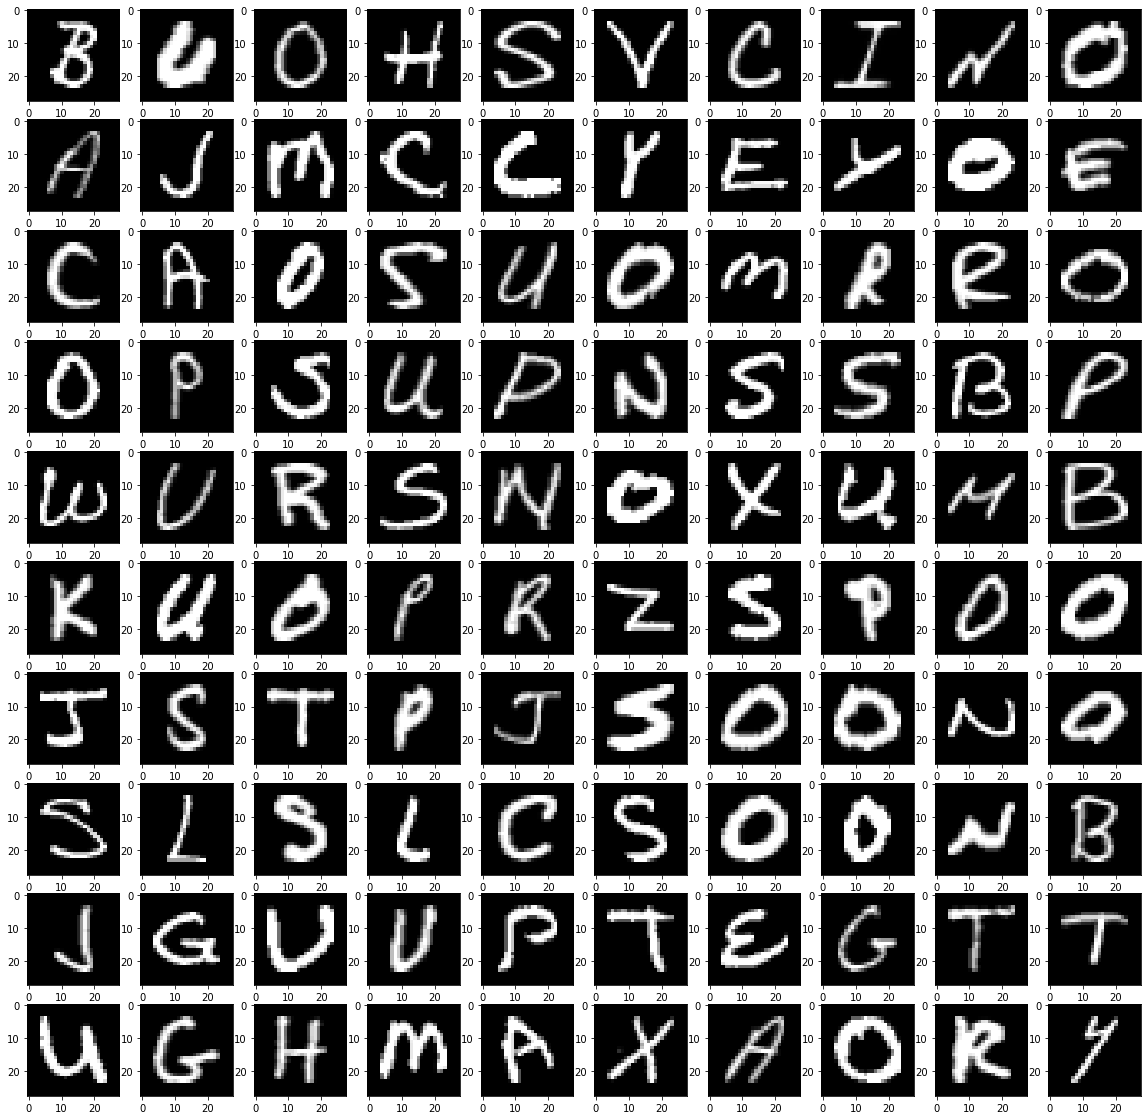

In [12]:
shuffled_data = shuffle(letter_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

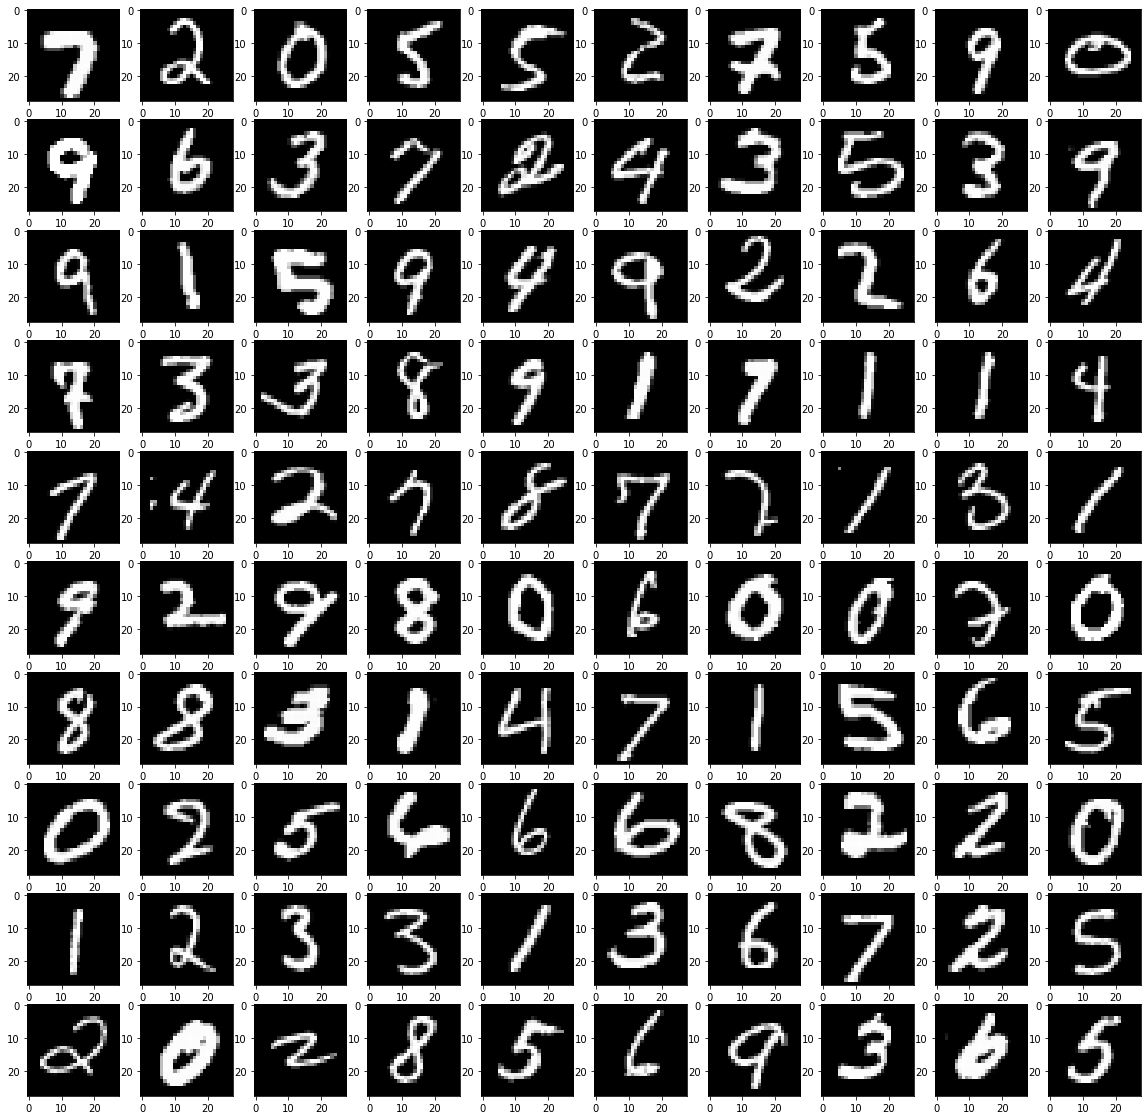

In [13]:
shuffled_data = shuffle(digit_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [14]:
data = np.concatenate((digit_data, letter_data))
target = np.concatenate((digit_target, letter_target))

print(data.shape, target.shape)

(442450, 28, 28, 1) (442450,)


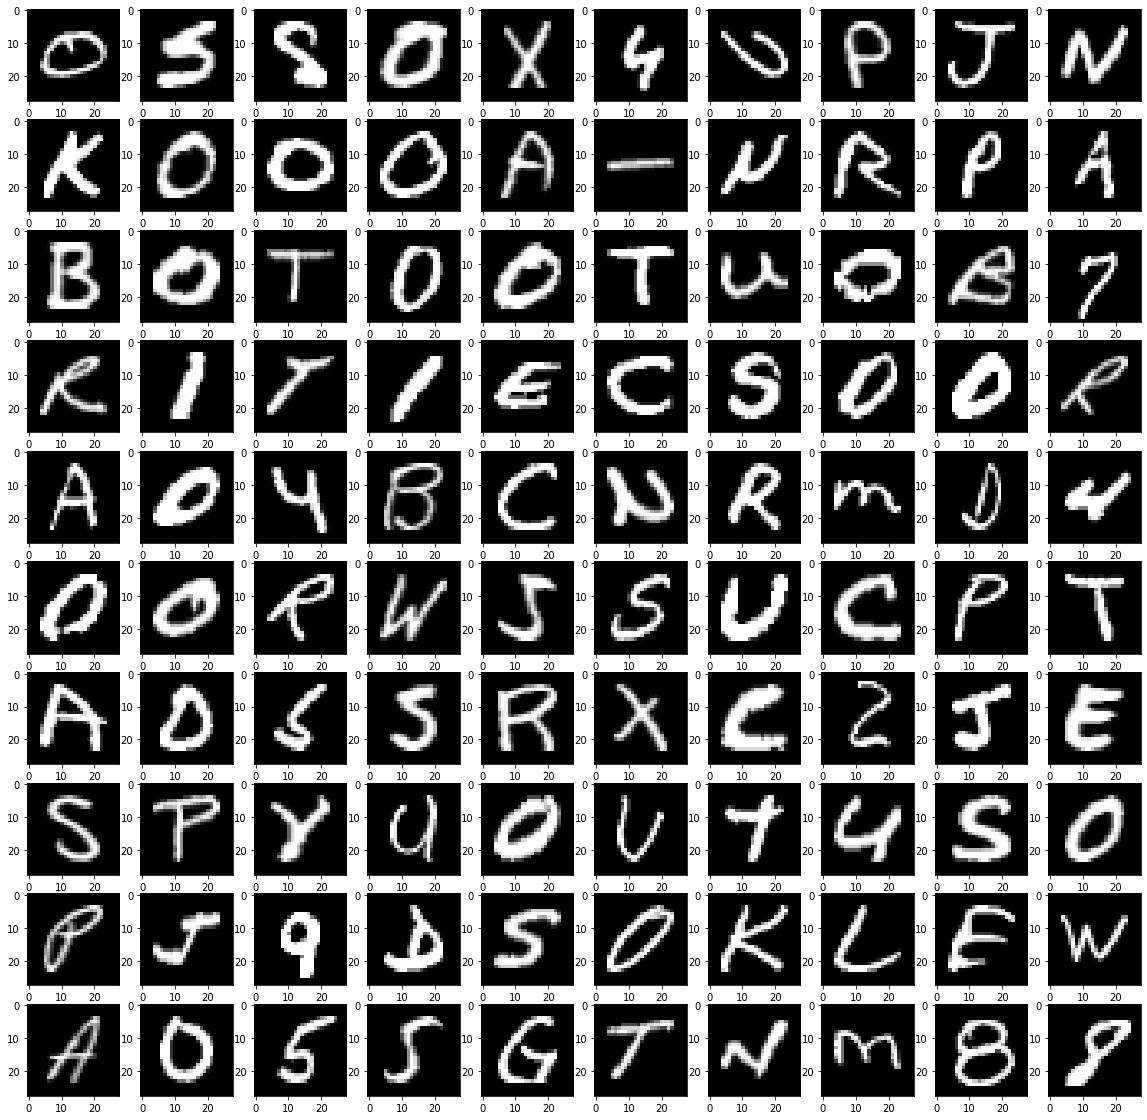

In [15]:
shuffled_data = shuffle(data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size=0.2)

In [17]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(353960, 28, 28, 1) (353960,)
(88490, 28, 28, 1) (88490,)


In [18]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))

In [19]:
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(353960, 28, 28, 1) (88490, 28, 28, 1)
(353960, 36) (88490, 36)


In [20]:
train_label_counts = [0 for i in range(36)]
test_label_counts = [0 for i in range(36)]

for i in range(train_data.shape[0]):
  train_label_counts[np.argmax(train_labels[i])] += 1

for i in range(test_data.shape[0]):
  test_label_counts[np.argmax(test_labels[i])] += 1

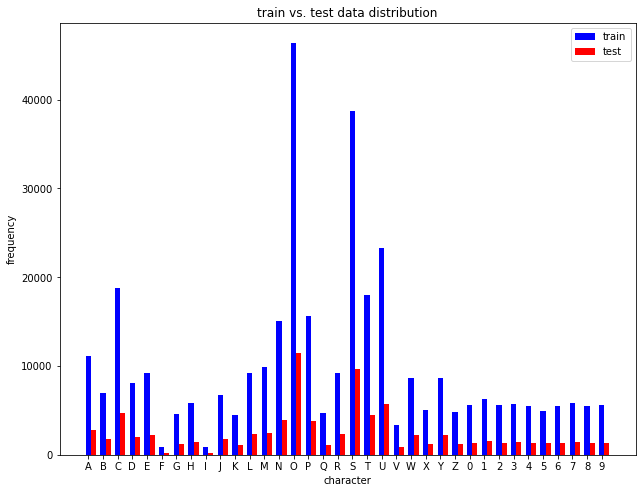

In [32]:
frequency = [
    train_label_counts, test_label_counts
] 

fig =  plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.xticks(range(len(frequency[0])), x)
plt.title("train vs. test data distribution")
plt.xlabel("character")
plt.ylabel("frequency")

ax.bar(np.arange(len(frequency[0])), frequency[0], color="b", width=0.35)
ax.bar(np.arange(len(frequency[1])) + 0.35, frequency[1], color="r", width=0.35)
ax.legend(labels=["train", "test"])

In [32]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_3 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_4 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                      

In [25]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [27]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=1, 
    batch_size=1000, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

354/354 [==============================] - 462s 1s/step - loss: 0.0707 - accuracy: 0.9795 - val_loss: 0.0703 - val_accuracy: 0.9802


In [28]:
model.load_weights("best_val_loss_model.h5")

In [29]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)

2766/2766 [==============================] - 34s 12ms/step - loss: 0.0703 - accuracy: 0.9802
0.07031987607479095 0.980246365070343


In [30]:
predictions = model.predict(test_data)